In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [3]:
import pickle

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
print(os.listdir("Data"))

['.DS_Store', 'test1', 'outliers', 'train']


In [9]:
#Constants
FAST_RUN = True
IMAGE_SIZE_128=(128, 128)
IMAGE_SIZE_64=(64, 64)
IMAGE_CHANNELS=3

In [10]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]
batch_size=18

In [11]:
filenames = os.listdir("Data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [12]:
df.shape

(25000, 2)

In [13]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [14]:
df_small = df[:1000]
df_small.shape

(1000, 2)

In [15]:
small_train_df, small_validate_df = train_test_split(df_small, test_size=0.20, random_state=42)
small_train_df = small_train_df.reset_index(drop=True)
small_validate_df = small_validate_df.reset_index(drop=True)

In [16]:
total_small_train = small_train_df.shape[0]
total_small_validate = small_validate_df.shape[0]

In [17]:
total_small_train, total_small_validate

(800, 200)

In [18]:
df_large = df[:10000]
df_large.shape

(10000, 2)

In [19]:
large_train_df, large_validate_df = train_test_split(df_large, test_size=0.20, random_state=42)
large_train_df = large_train_df.reset_index(drop=True)
large_validate_df = large_validate_df.reset_index(drop=True)

In [20]:
total_large_train = large_train_df.shape[0]
total_large_validate = large_validate_df.shape[0]

In [21]:
total_large_train, total_large_validate

(8000, 2000)

# 64x64 Resolution

## Model 1 - small dataset

In [22]:
small_train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

small_train_generator = small_train_datagen.flow_from_dataframe(
    small_train_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_64,
    class_mode='categorical',
    batch_size=batch_size
)

Found 800 validated image filenames belonging to 2 classes.


In [23]:
small_validation_datagen = ImageDataGenerator(rescale=1./255)
small_validation_generator = small_validation_datagen.flow_from_dataframe(
    small_validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_64,
    class_mode='categorical',
    batch_size=batch_size
)

Found 200 validated image filenames belonging to 2 classes.


In [32]:
x,y = small_train_generator.next()

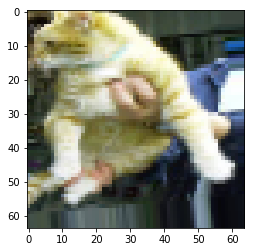

In [33]:
plt.imshow(x[0])

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0916 16:37:51.094666 140735779607360 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 16:37:51.110058 140735779607360 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 16:37:51.112634 140735779607360 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 16:37:51.136970 140735779607360 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0916 16:37:51.137814 1407357796

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [24]:
epochs=25 if FAST_RUN else 50
history = model.fit_generator(
    small_train_generator, 
    epochs=epochs,
    validation_data=small_validation_generator,
    validation_steps=total_small_validate//batch_size,
    steps_per_epoch=total_small_train//batch_size,
    callbacks=callbacks
)

W0916 16:37:56.071732 140735779607360 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
44/44 [==============================] - 11s 251ms/step - loss: 1.5996 - acc: 0.5167 - val_loss: 1.1530 - val_acc: 0.6061
Epoch 2/25
44/44 [==============================] - 11s 245ms/step - loss: 1.1135 - acc: 0.5758 - val_loss: 1.3997 - val_acc: 0.5330
Epoch 3/25
44/44 [==============================] - 10s 233ms/step - loss: 0.9454 - acc: 0.6099 - val_loss: 0.7092 - val_acc: 0.7198
Epoch 4/25
44/44 [==============================] - 10s 225ms/step - loss: 0.8782 - acc: 0.5942 - val_loss: 0.7999 - val_acc: 0.6429
Epoch 5/25
44/44 [==============================] - 10s 225ms/step - loss: 0.8060 - acc: 0.6314 - val_loss: 1.1214 - val_acc: 0.5275

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/25
44/44 [==============================] - 10s 227ms/step - loss: 0.7398 - acc: 0.6278 - val_loss: 0.5943 - val_acc: 0.7582
Epoch 7/25
44/44 [==============================] - 11s 250ms/step - loss: 0.6657 - acc: 0.6789 - val_loss: 0.5874 - val_

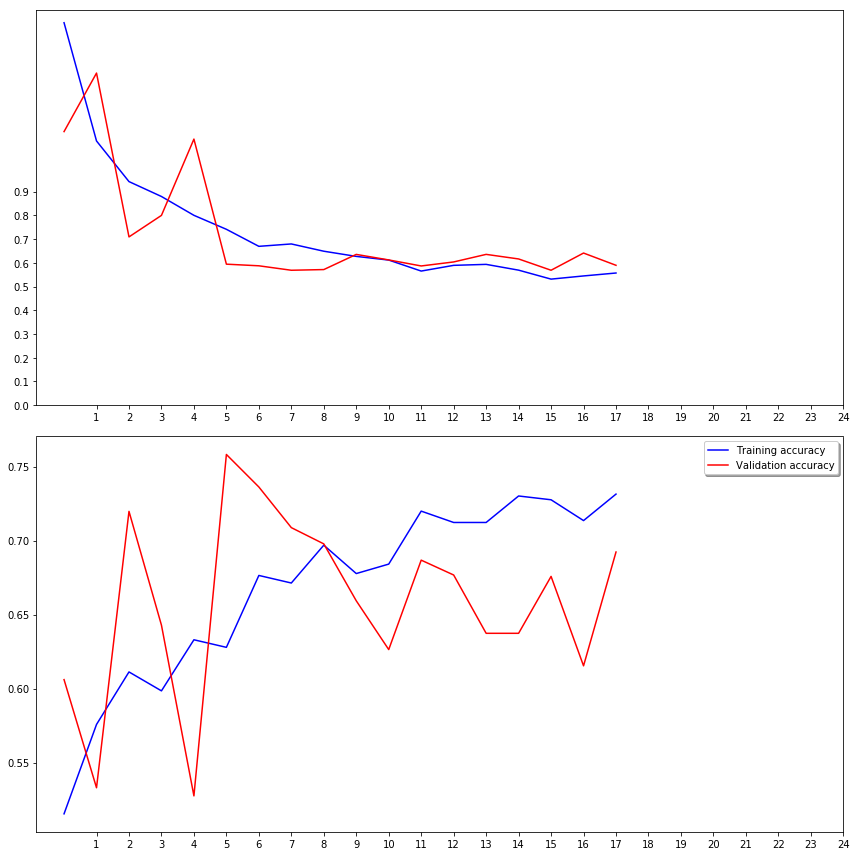

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### OUTLIER TESTING

In [26]:
test_filenames = os.listdir("Data/outliers")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [27]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/outliers/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE_64,
    batch_size=batch_size,
    shuffle=False
)

Found 5 validated image filenames.


In [28]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [29]:
results = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in small_train_generator.class_indices.items())
results = pd.DataFrame(results).replace(label_map)

In [30]:
test_df.head()

,filename
0,km.jpg
1,pb.jpg
2,cr.jpg
3,dvdb.jpg
4,lm.jpg


In [31]:
results

,0
0,dog
1,dog
2,cat
3,dog
4,dog


## Model 2 - large dataset

In [32]:
large_train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

large_train_generator = large_train_datagen.flow_from_dataframe(
    large_train_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_64,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8000 validated image filenames belonging to 2 classes.


In [33]:
large_validation_datagen = ImageDataGenerator(rescale=1./255)
large_validation_generator = large_validation_datagen.flow_from_dataframe(
    large_validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_64,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2000 validated image filenames belonging to 2 classes.


In [34]:
x,y = small_train_generator.next()

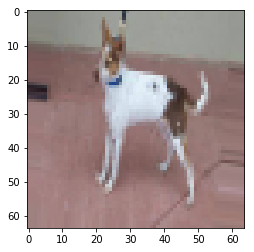

In [35]:
plt.imshow(x[0])

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [37]:
epochs=25 if FAST_RUN else 50
history = model.fit_generator(
    large_train_generator, 
    epochs=epochs,
    validation_data=large_validation_generator,
    validation_steps=total_large_validate//batch_size,
    steps_per_epoch=total_large_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
444/444 [==============================] - 109s 246ms/step - loss: 0.9172 - acc: 0.5891 - val_loss: 1.3531 - val_acc: 0.5310
Epoch 2/25
444/444 [==============================] - 89s 201ms/step - loss: 0.6596 - acc: 0.6466 - val_loss: 0.6400 - val_acc: 0.6675
Epoch 3/25
444/444 [==============================] - 95s 214ms/step - loss: 0.5969 - acc: 0.6967 - val_loss: 0.5597 - val_acc: 0.7124
Epoch 4/25
444/444 [==============================] - 92s 207ms/step - loss: 0.5650 - acc: 0.7109 - val_loss: 0.5130 - val_acc: 0.7538
Epoch 5/25
444/444 [==============================] - 93s 210ms/step - loss: 0.5552 - acc: 0.7284 - val_loss: 0.5739 - val_acc: 0.6978
Epoch 6/25
444/444 [==============================] - 100s 224ms/step - loss: 0.5320 - acc: 0.7391 - val_loss: 0.6723 - val_acc: 0.6837

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/25
444/444 [==============================] - 101s 228ms/step - loss: 0.4795 - acc: 0.7757 - val_lo

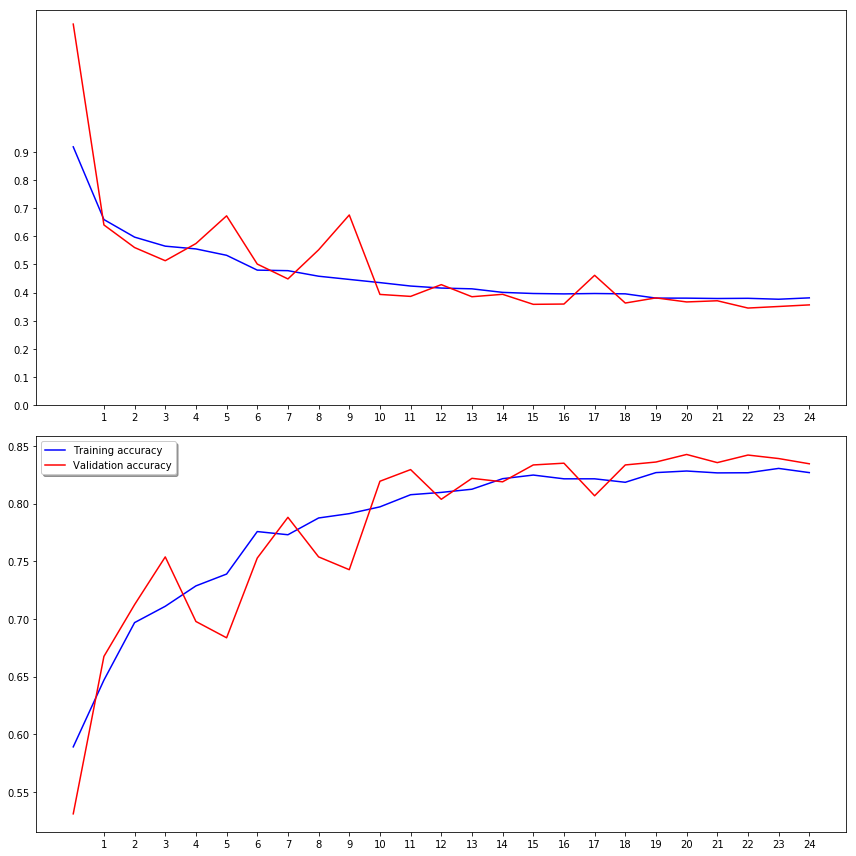

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### OUTLIER TESTING

In [39]:
test_filenames = os.listdir("Data/outliers")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [40]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/outliers/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE_64,
    batch_size=batch_size,
    shuffle=False
)

Found 5 validated image filenames.


In [41]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [42]:
results = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in large_train_generator.class_indices.items())
results = pd.DataFrame(results).replace(label_map)

In [43]:
test_df.head()

,filename
0,km.jpg
1,pb.jpg
2,cr.jpg
3,dvdb.jpg
4,lm.jpg


In [44]:
results

,0
0,dog
1,dog
2,dog
3,dog
4,dog


# 128x128 Resolution

## Model 1 - small dataset

In [34]:
small_train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

small_train_generator = small_train_datagen.flow_from_dataframe(
    small_train_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_128,
    class_mode='categorical',
    batch_size=batch_size
)

Found 800 validated image filenames belonging to 2 classes.


In [35]:
small_validation_datagen = ImageDataGenerator(rescale=1./255)
small_validation_generator = small_validation_datagen.flow_from_dataframe(
    small_validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_128,
    class_mode='categorical',
    batch_size=batch_size
)

Found 200 validated image filenames belonging to 2 classes.


In [46]:
x,y = small_train_generator.next()

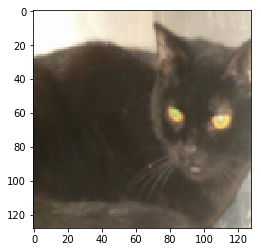

In [47]:
plt.imshow(x[0])

In [49]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [50]:
epochs=25 if FAST_RUN else 50
history = model.fit_generator(
    small_train_generator, 
    epochs=epochs,
    validation_data=small_validation_generator,
    validation_steps=total_small_validate//batch_size,
    steps_per_epoch=total_small_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
44/44 [==============================] - 34s 774ms/step - loss: 1.3259 - acc: 0.5518 - val_loss: 1.4850 - val_acc: 0.5859
Epoch 2/25
44/44 [==============================] - 33s 744ms/step - loss: 0.9907 - acc: 0.5631 - val_loss: 1.1577 - val_acc: 0.5879
Epoch 3/25
44/44 [==============================] - 32s 720ms/step - loss: 0.9932 - acc: 0.5891 - val_loss: 1.4813 - val_acc: 0.5989
Epoch 4/25
44/44 [==============================] - 32s 721ms/step - loss: 0.9283 - acc: 0.6114 - val_loss: 0.9177 - val_acc: 0.5714
Epoch 5/25
44/44 [==============================] - 32s 725ms/step - loss: 0.8591 - acc: 0.6095 - val_loss: 0.8512 - val_acc: 0.5989

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/25
44/44 [==============================] - 32s 718ms/step - loss: 0.7696 - acc: 0.6099 - val_loss: 0.5116 - val_acc: 0.7473
Epoch 7/25
44/44 [==============================] - 32s 719ms/step - loss: 0.7271 - acc: 0.6306 - val_loss: 0.6150 - val_

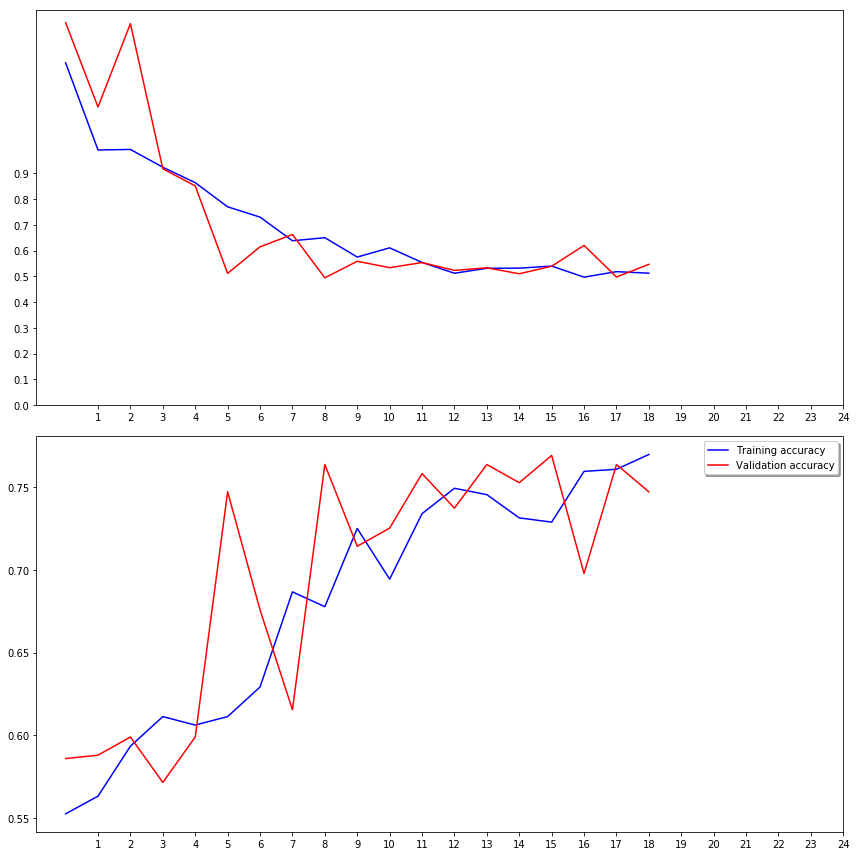

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### OUTLIER TESTING

In [52]:
test_filenames = os.listdir("Data/outliers")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [53]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/outliers/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE_128,
    batch_size=batch_size,
    shuffle=False
)

Found 5 validated image filenames.


In [54]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [55]:
results = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in small_train_generator.class_indices.items())
results = pd.DataFrame(results).replace(label_map)

In [56]:
test_df.head()

,filename
0,km.jpg
1,pb.jpg
2,cr.jpg
3,dvdb.jpg
4,lm.jpg


In [57]:
results

,0
0,dog
1,dog
2,dog
3,dog
4,dog


## Model 2 - large dataset

In [58]:
large_train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

large_train_generator = large_train_datagen.flow_from_dataframe(
    large_train_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_128,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8000 validated image filenames belonging to 2 classes.


In [59]:
large_validation_datagen = ImageDataGenerator(rescale=1./255)
large_validation_generator = large_validation_datagen.flow_from_dataframe(
    large_validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE_128,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2000 validated image filenames belonging to 2 classes.


In [60]:
x,y = small_train_generator.next()

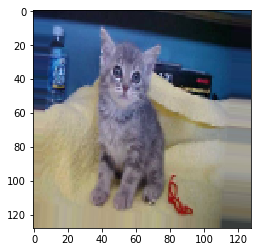

In [61]:
plt.imshow(x[0])

In [62]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
__________

In [63]:
epochs=25 if FAST_RUN else 50
history = model.fit_generator(
    large_train_generator, 
    epochs=epochs,
    validation_data=large_validation_generator,
    validation_steps=total_large_validate//batch_size,
    steps_per_epoch=total_large_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
444/444 [==============================] - 321s 724ms/step - loss: 0.8955 - acc: 0.5946 - val_loss: 0.8606 - val_acc: 0.5976
Epoch 2/25
444/444 [==============================] - 318s 715ms/step - loss: 0.6302 - acc: 0.6671 - val_loss: 0.7649 - val_acc: 0.6196
Epoch 3/25
444/444 [==============================] - 317s 714ms/step - loss: 0.5731 - acc: 0.7063 - val_loss: 0.5811 - val_acc: 0.7099
Epoch 4/25
444/444 [==============================] - 330s 743ms/step - loss: 0.5508 - acc: 0.7260 - val_loss: 0.5807 - val_acc: 0.6978
Epoch 5/25
444/444 [==============================] - 455s 1s/step - loss: 0.5224 - acc: 0.7496 - val_loss: 0.5230 - val_acc: 0.7417
Epoch 6/25
444/444 [==============================] - 363s 818ms/step - loss: 0.5045 - acc: 0.7595 - val_loss: 0.6578 - val_acc: 0.7023
Epoch 7/25
444/444 [==============================] - 345s 778ms/step - loss: 0.5015 - acc: 0.7609 - val_loss: 0.5495 - val_acc: 0.7427
Epoch 8/25
444/444 [==============================]

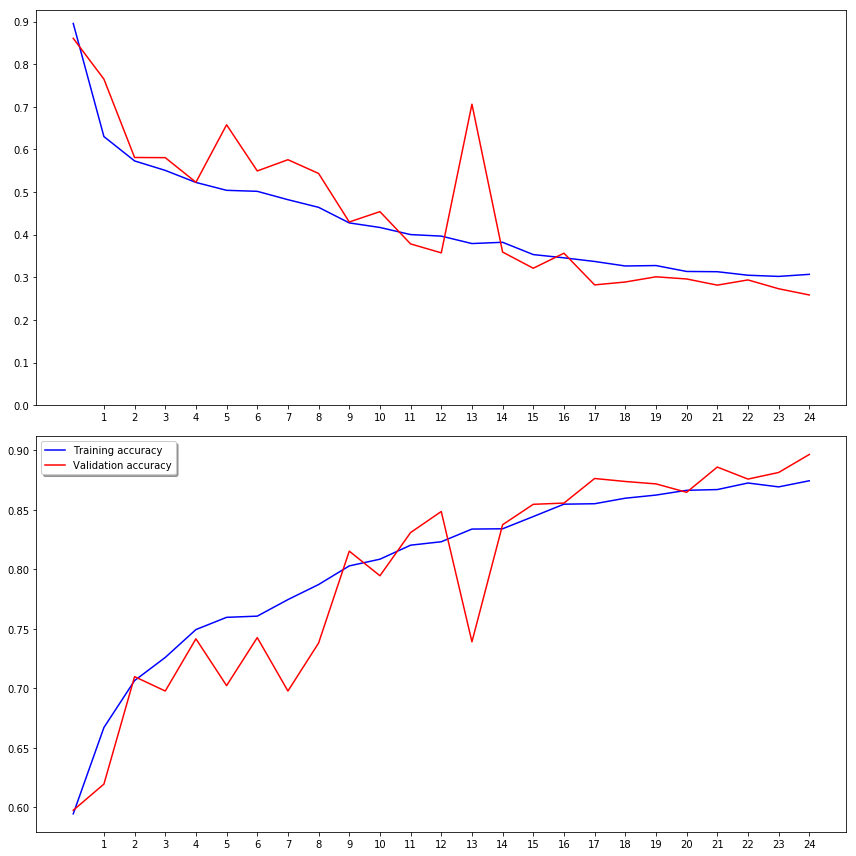

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### OUTLIER TESTING

In [65]:
test_filenames = os.listdir("Data/outliers")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [66]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/outliers/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE_128,
    batch_size=batch_size,
    shuffle=False
)

Found 5 validated image filenames.


In [67]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [68]:
results = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in large_train_generator.class_indices.items())
results = pd.DataFrame(results).replace(label_map)

In [69]:
test_df.head()

,filename
0,km.jpg
1,pb.jpg
2,cr.jpg
3,dvdb.jpg
4,lm.jpg


In [70]:
results

,0
0,dog
1,dog
2,cat
3,dog
4,dog
